In [1]:
!pip install astropy

In [2]:
from IPython.display import Image

import warnings
warnings.filterwarnings('ignore')

import numpy as np
from astropy import units as u
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord

In [3]:
!pip install eleanor

     |████████████████████████████████| 6.7 MB 5.3 MB/s 
     |████████████████████████████████| 832 kB 65.1 MB/s 
     |████████████████████████████████| 245 kB 69.8 MB/s 
     |████████████████████████████████| 4.4 MB 70.6 MB/s 
     |████████████████████████████████| 110.5 MB 654 bytes/s 
     |████████████████████████████████| 22.3 MB 1.4 MB/s 
     |████████████████████████████████| 41 kB 167 kB/s 
     |████████████████████████████████| 98 kB 7.2 MB/s 
     |████████████████████████████████| 802 kB 50.3 MB/s 
     |████████████████████████████████| 54 kB 2.3 MB/s 
     |████████████████████████████████| 3.2 MB 14.2 MB/s 
     |████████████████████████████████| 3.8 MB 49.9 MB/s 
     |████████████████████████████████| 503 kB 55.2 MB/s 
     |████████████████████████████████| 50 kB 5.2 MB/s 
     |████████████████████████████████| 2.9 MB 59.0 MB/s 
     |████████████████████████████████| 20.1 MB 1.2 MB/s 
  Created wheel for eleanor: filename=eleanor-2.0.3-py2.py3-none-any.whl size

In [4]:
import eleanor

In [5]:
#with name
star = eleanor.Source(name='WASP-33', sector=18)

print('Found TIC {0} (Gaia {1}), with TESS magnitude {2}, RA {3}, and Dec {4}'
     .format(star.tic, star.gaia, star.tess_mag, star.coords[0], star.coords[1]))

Most recent sector available =  39
Inflating...
This is the first light curve you have made for this sector. Getting eleanor metadata products for Sector 18...
This will only take a minute, and only needs to be done once. Any other light curves you make in this sector will be faster.
Acquiring target...
Calculating Cadences...
Assuring Quality Flags...
Making CBVs...
Success! Sector 18 now available.
No eleanor postcard has been made for your target (yet). Using TessCut instead.
Inflating...
Found TIC 129979528 (Gaia 328636019723252096), with TESS magnitude 7.87611, RA 36.7127425, and Dec 37.550482499999994


# 1. Light Curve

In [ ]:
data = eleanor.TargetData(star, height=15, width=15, bkg_size=31, do_psf=True, do_pca=True, regressors='corner')

100%|██████████| 1107/1107 [00:22<00:00, 49.81it/s]


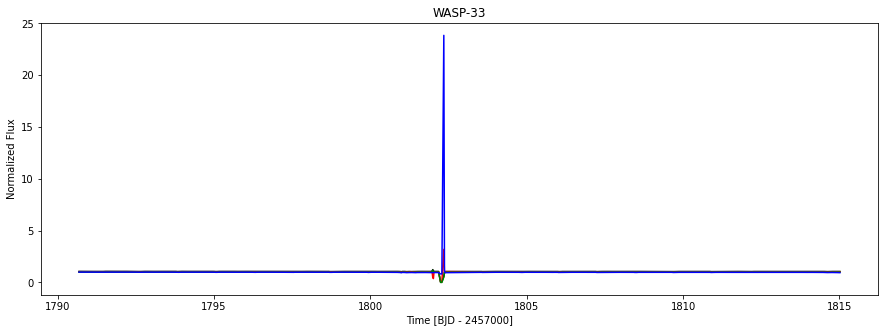

In [ ]:
plt.figure(figsize=(15,5))

q = data.quality == 0

plt.plot(data.time[q], data.raw_flux[q]/np.nanmedian(data.raw_flux[q])+0.06, 'k')
plt.plot(data.time[q], data.corr_flux[q]/np.nanmedian(data.corr_flux[q]) + 0.03, 'r')
plt.plot(data.time[q], data.pca_flux[q]/np.nanmedian(data.pca_flux[q]), 'g')
plt.plot(data.time[q], data.psf_flux[q]/np.nanmedian(data.psf_flux[q]) - 0.02, 'b')
plt.ylabel('Normalized Flux')
plt.xlabel('Time [BJD - 2457000]')
plt.title('WASP-33');

In [ ]:
data.bkg_type

'TPF_LEVEL'

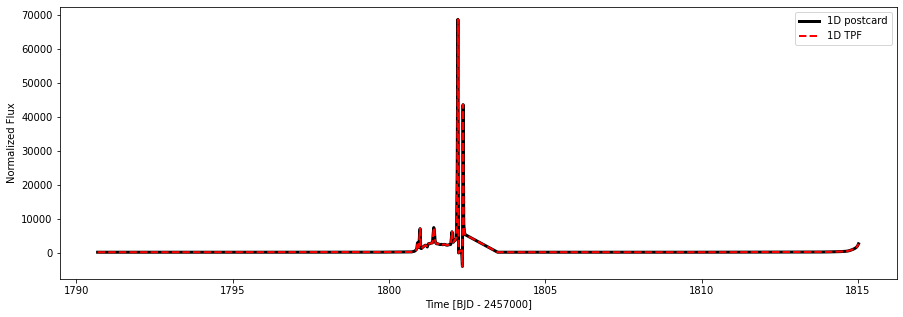

In [ ]:
plt.figure(figsize=(15,5))

plt.plot(data.time, data.flux_bkg, 'k', label='1D postcard', linewidth=3)
plt.plot(data.time, data.tpf_flux_bkg, 'r--', label='1D TPF', linewidth=2)
plt.ylabel('Normalized Flux')
plt.xlabel('Time [BJD - 2457000]')
plt.legend();

# 2. TPF

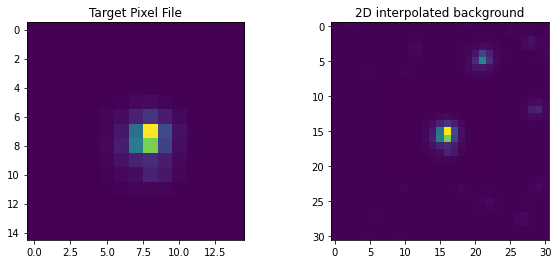

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,4))
ax1.imshow(data.tpf[0])
ax1.set_title('Target Pixel File')
ax2.imshow(data.bkg_tpf[0])
ax2.set_title('2D interpolated background');

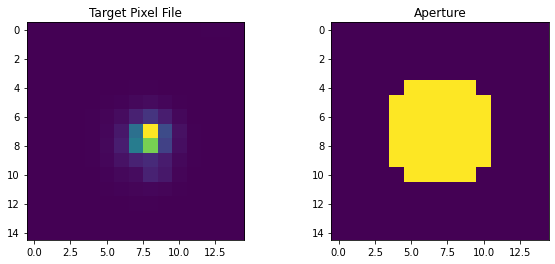

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,4))
ax1.imshow(data.tpf[0])
ax1.set_title('Target Pixel File')
ax2.imshow(data.aperture)
ax2.set_title('Aperture');

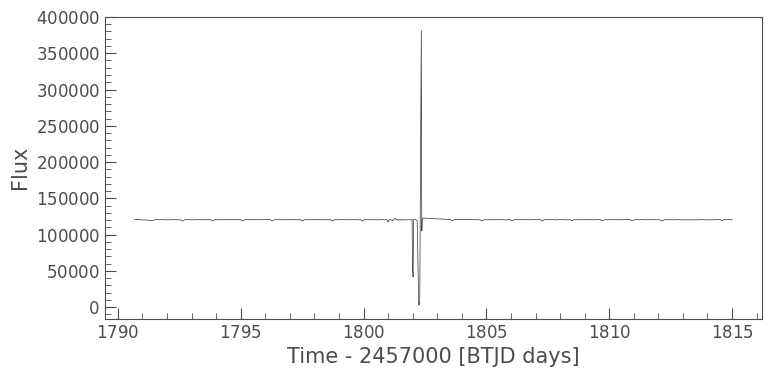

In [ ]:
lk = data.to_lightkurve()
lk.plot()

In [ ]:
star = eleanor.multi_sectors(tic=129979528, sectors=[18,39])

ConnectionError: ignored

# 3. Choosing Aperture

In [ ]:
star = eleanor.Source(tic=129979528,sector=18)
data = eleanor.TargetData(star, height=15, width=15, bkg_size=31, do_psf=True, do_pca=True)
q = data.quality == 0

No eleanor postcard has been made for your target (yet). Using TessCut instead.
Inflating...


100%|██████████| 1107/1107 [00:22<00:00, 49.17it/s]


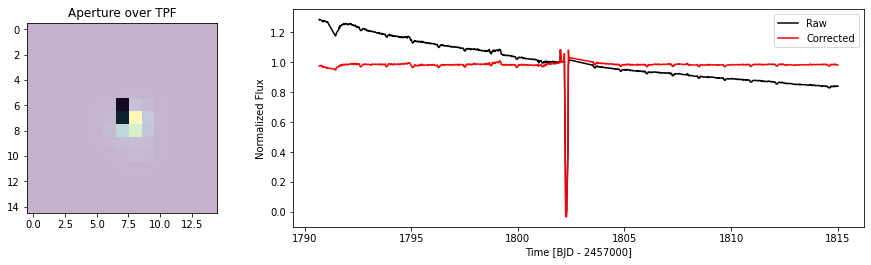

In [ ]:
#calling all light curve data stored by eleanor

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,4), gridspec_kw={'width_ratios':[1,3]})
ax1.imshow(data.tpf[0])
ax1.imshow(data.all_apertures[0], cmap='Greys', alpha=0.7)
ax1.set_title('Aperture over TPF')

ax2.plot(data.time[q], data.all_raw_flux[0][q]/np.nanmedian(data.all_raw_flux[0][q]), 'k', label='Raw')
ax2.plot(data.time[q], data.all_corr_flux[0][q]/np.nanmedian(data.all_corr_flux[0][q]) - 0.015, 'r', label='Corrected')
ax2.set_xlabel('Time [BJD - 2457000]')
ax2.set_ylabel('Normalized Flux')
ax2.legend();


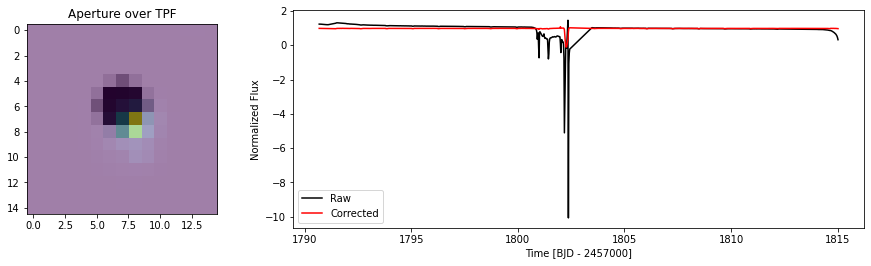

In [ ]:
eleanor.TargetData.custom_aperture(data, shape='circle', r=2, pos=[7,6], method='exact')
eleanor.TargetData.get_lightcurve(data)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,4), gridspec_kw={'width_ratios':[1,3]})
ax1.imshow(data.tpf[0])
ax1.imshow(data.aperture, cmap='Greys', alpha=0.5)
ax1.set_title('Aperture over TPF')
#plt.imshow(data.aperture)

ax2.plot(data.time[q], data.raw_flux[q]/np.nanmedian(data.raw_flux[q]), 'k', label='Raw')
ax2.plot(data.time[q], data.corr_flux[q]/np.nanmedian(data.corr_flux[q]) - 0.015, 'r', label='Corrected')
ax2.legend()
ax2.set_xlabel('Time [BJD - 2457000]')
ax2.set_ylabel('Normalized Flux');

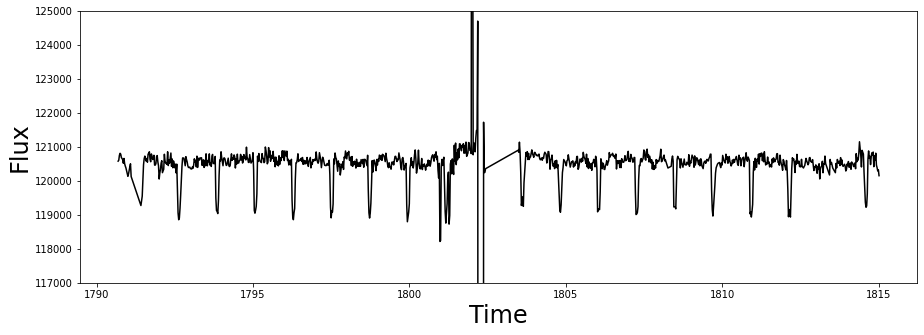

In [ ]:
corr_flux = eleanor.TargetData.corrected_flux(data, flux=data.raw_flux)
plt.figure(figsize=(15,5))
plt.plot(data.time[q], corr_flux[q], 'k')

plt.ylabel('Flux', fontsize=24)
plt.ylim([117000,125000])
plt.xlabel('Time', fontsize=24);

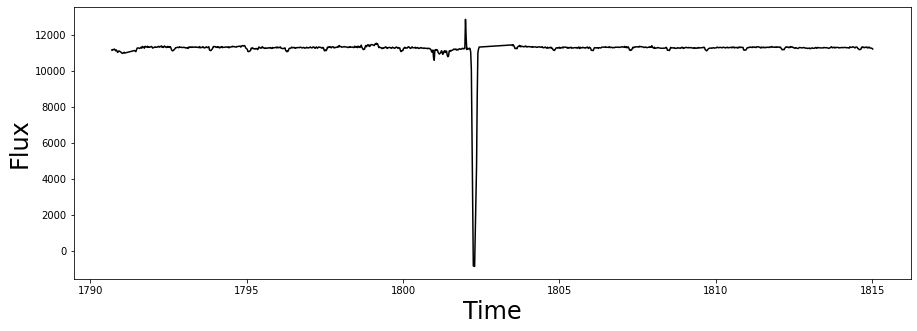

In [ ]:
data.quality[q][(data.time[q] > 1333) & (data.time[q] < 1337)] = -8675309
corr_flux = eleanor.TargetData.corrected_flux(data, flux=data.raw_flux)

q = data.quality <= 0.5

plt.figure(figsize=(15,5))
plt.plot(data.time[q], corr_flux[q], 'k')

plt.ylabel('Flux', fontsize=24)
plt.xlabel('Time', fontsize=24);

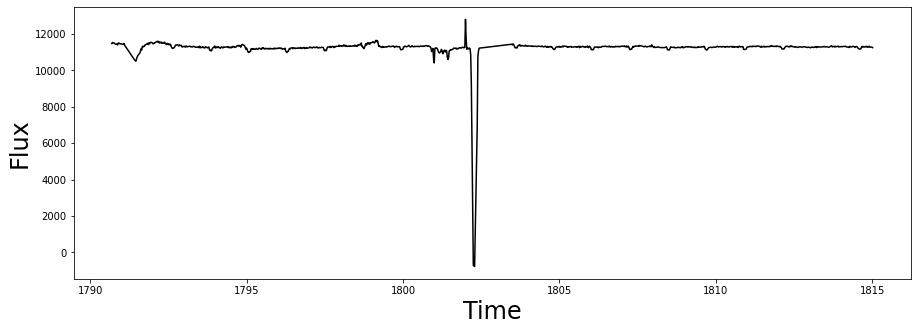

In [ ]:
data.cbvs = np.zeros_like(data.cbvs)
data.centroid_xs = np.zeros_like(data.centroid_xs)
data.centroid_ys = np.zeros_like(data.centroid_ys)

corr_flux = eleanor.TargetData.corrected_flux(data, flux=data.raw_flux)

plt.figure(figsize=(15,5))
plt.plot(data.time[q], corr_flux[q], 'k')

plt.ylabel('Flux', fontsize=24)
plt.xlabel('Time', fontsize=24);

In [ ]:
data = eleanor.TargetData(star, height=15, width=15, bkg_size=31, do_psf=True, do_pca=True)

100%|██████████| 1107/1107 [00:22<00:00, 48.53it/s]


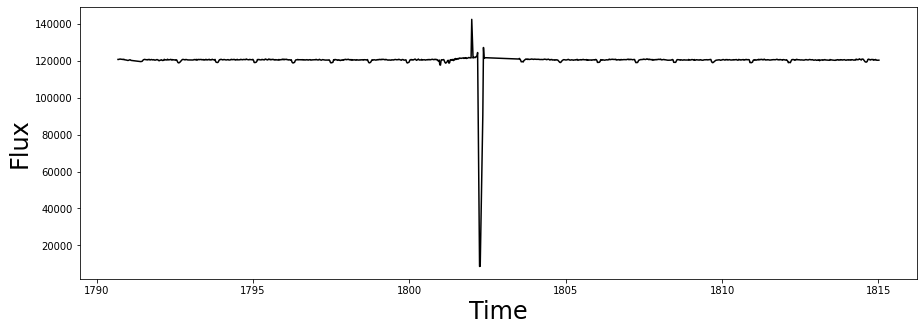

In [ ]:
reg_array = np.array([data.psf_b, data.psf_c, data.psf_x]).T
corr_flux = eleanor.TargetData.corrected_flux(data, flux=data.raw_flux, regressors=reg_array)

plt.figure(figsize=(15,5))
plt.plot(data.time[q], corr_flux[q], 'k')

plt.ylabel('Flux', fontsize=24)
plt.xlabel('Time', fontsize=24);